[View in Colaboratory](https://colab.research.google.com/github/mogamin/chainer-examples/blob/master/chainer_iris.ipynb)

In [3]:
!pip install chainer
import chainer

In [0]:
import chainer.links as L
import chainer.functions as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [23]:
print(iris.keys())
print(iris['DESCR'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ==

In [37]:
print(iris['target_names'])
print(iris['target'].shape)
print(iris['data'].shape)
print(iris['feature_names'])
print(iris.data[:10,:])

['setosa' 'versicolor' 'virginica']
(150,)
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [52]:
from sklearn import preprocessing
X0 = iris.data
print(X0[:10,:])
X1 = preprocessing.scale(X0)
rint(X1[:10,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


In [55]:
X2 = X1.astype(np.float32)
print(X2[:10,:])

[[-0.9006812   1.0320572  -1.3412724  -1.3129767 ]
 [-1.1430169  -0.1249576  -1.3412724  -1.3129767 ]
 [-1.3853526   0.33784834 -1.3981382  -1.3129767 ]
 [-1.5065205   0.10644536 -1.2844067  -1.3129767 ]
 [-1.021849    1.2634602  -1.3412724  -1.3129767 ]
 [-0.53717756  1.9576691  -1.1706753  -1.0500308 ]
 [-1.5065205   0.80065423 -1.3412724  -1.1815038 ]
 [-1.021849    0.80065423 -1.2844067  -1.3129767 ]
 [-1.7488563  -0.35636055 -1.3412724  -1.3129767 ]
 [-1.1430169   0.10644536 -1.2844067  -1.4444497 ]]


In [62]:
Y0 = iris.target
print(Y0.shape)
Y1 = Y0.flatten().astype(np.int32)
print(Y1)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [80]:
X = X2
Y = Y1
dataset = list(zip(X, Y))
train, test = chainer.datasets.split_dataset_random(dataset, int(len(X)*0.7), seed=0)
print(len(train))
print(len(test))

105
45


In [0]:
class IrisNN(chainer.Chain):
  def __init__(self, n_mid_units=5, n_out=3):
    super().__init__()
    with self.init_scope():
      self.fc1 = L.Linear(None, n_mid_units)
      self.fc2 = L.Linear(None, n_out)
      
  def __call__(self, x):
    h = self.fc1(x)
    h = F.relu(h)
    h = self.fc2(h)
    return h 

In [0]:
batchsize = 1
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

In [236]:
model = L.Classifier(IrisNN())
optimizer = chainer.optimizers.SGD()
optimizer.setup(model)

In [0]:
from chainer import training
updater = training.StandardUpdater(train_iter, optimizer, device=-1)

In [238]:
epoch = 30
trainer = training.Trainer(updater, (epoch,'epoch'), out='result/iris')

from chainer.training import extensions
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))
trainer.extend(extensions.LogReport(trigger=(1,'epoch')))
trainer.extend(extensions.PrintReport(['epoch','main/accuracy','validation/main/accuracy','main/loss','validation/main/loss','elapsed_time']), trigger=(1,'epoch'))
trainer.run()

epoch       main/accuracy  validation/main/accuracy  main/loss   validation/main/loss  elapsed_time
1           0.32381        0.622222                  1.12921     0.973917              0.244068      
2           0.695238       0.844444                  0.851726    0.730597              0.48313       
3           0.780952       0.822222                  0.650774    0.563864              0.723168      
4           0.780952       0.911111                  0.530057    0.465548              0.959421      
5           0.866667       0.911111                  0.456119    0.40695               1.21623       
6           0.857143       0.911111                  0.406316    0.361011              1.47184       
7           0.87619        0.911111                  0.368837    0.321867              1.71085       
8           0.895238       0.933333                  0.338469    0.295564              1.94551       
9           0.92381        0.933333                  0.312991    0.273441           

In [0]:
import json
with open('result/iris/log') as f:
  logs = json.load(f)
  results = pd.DataFrame(logs)

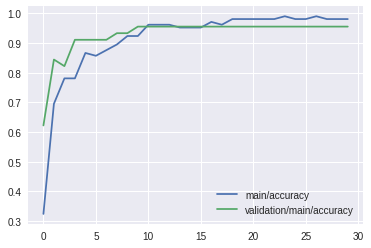

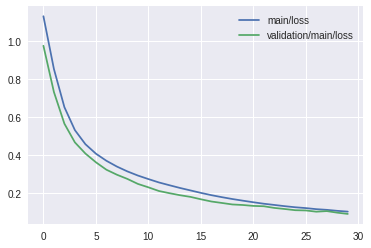

In [240]:
results[['main/accuracy','validation/main/accuracy']].plot()
results[['main/loss','validation/main/loss']].plot()